# Predicción del precio de viviendas

Sobre este archivo <br>
1. longitude: Medida de cuán al oeste se encuentra una casa; un valor más alto está más al oeste. <br>

2. latitude: Medida de cuán al norte se encuentra una casa; un valor más alto está más al norte. <br>

3. housingMedianAge: Edad mediana de una vivienda dentro de una manzana; un número más bajo indica un edificio más nuevo. <br>

4. totalRooms: Número total de habitaciones dentro de una manzana. <br>

5. totalBedrooms: Número total de dormitorios dentro de una manzana. <br>

6. population: Número total de personas que residen dentro de una manzana. <br>

7. households: Número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda, para una manzana. <br>

8. medianIncome: Ingreso mediano para los hogares dentro de una manzana de viviendas (medido en decenas de miles de dólares estadounidenses). <br>

9. medianHouseValue: Valor mediano de las casas para los hogares dentro de una manzana (medido en dólares estadounidenses). <br>

10. oceanProximity: Ubicación de la casa con respecto al océano/mar. <br>

In [57]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/CoderHouse/46300/Clase 12 - Introducción al análisis predictivo con Regresión/

/content/drive/MyDrive/CoderHouse/46300/Clase 12 - Introducción al análisis predictivo con Regresión


In [7]:
house_data = pd.read_csv("housing.csv")
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
house_data.shape

(20640, 10)

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Verificando la existencia de NaN y contando la cantidad
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Text(0, 0.5, 'Frecuencia')

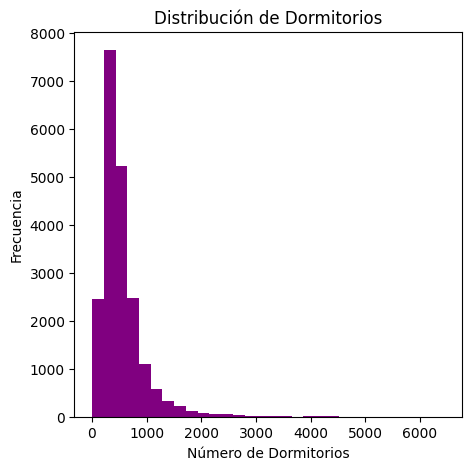

In [15]:
# Histograma de la variable total_bedrooms
plt.figure(figsize=(5,5))

# Crear un histograma de la variable "total_bedrooms"
plt.hist(house_data[house_data["total_bedrooms"].notnull()]["total_bedrooms"],bins=30,color="purple")

# Agregar título y labels
plt.title("Distribución de Dormitorios")
plt.xlabel("Número de Dormitorios")
plt.ylabel("Frecuencia")

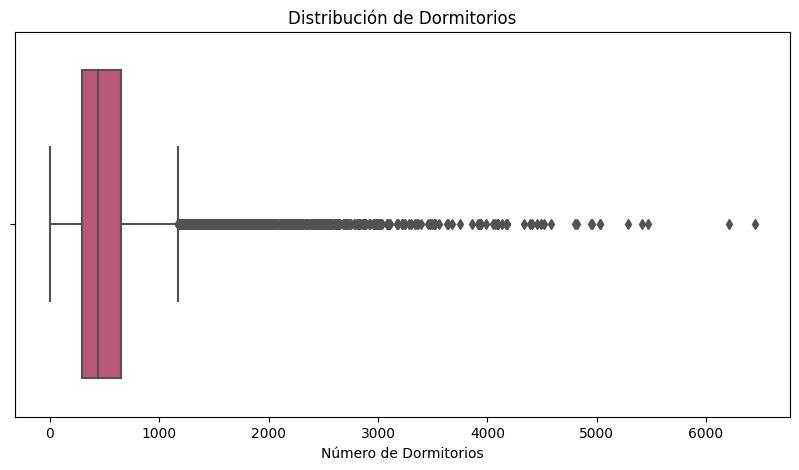

In [16]:
plt.figure(figsize=(10,5))

# Crear un gráfico de caja (boxplot) para la variable "total_bedrooms"
sns.boxplot(x="total_bedrooms",data=house_data, palette="plasma")
# Título del gráfico
plt.title("Distribución de Dormitorios")

# Etiqueta del eje X
plt.xlabel("Número de Dormitorios")

# Mostrar el gráfico
plt.show()

In [17]:
# Llenando los valores faltantes en la columna "total_bedrooms" con la mediana
house_data['total_bedrooms'] = house_data['total_bedrooms'].fillna((house_data['total_bedrooms'].median()))

In [18]:
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Text(0.5, 0.98, 'Distribuciones de Variables de Datos de Viviendas en California')

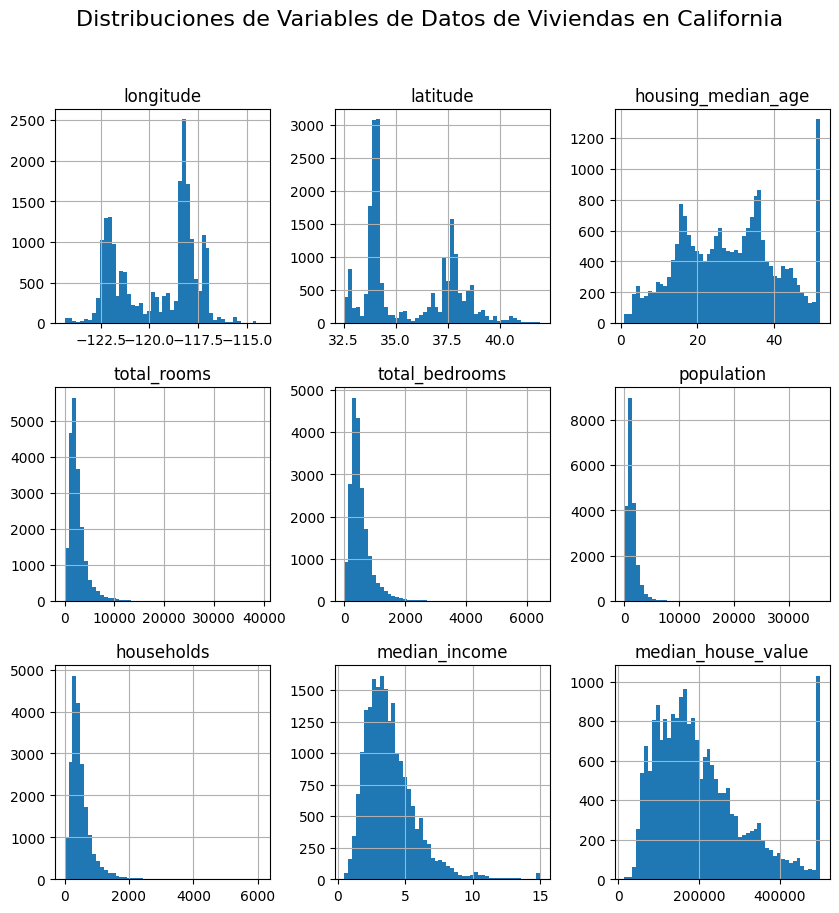

In [20]:
# "Distribuciones de Variables de Datos de Viviendas en California"
house_data.hist(bins=50,figsize=(10,10))
plt.suptitle("Distribuciones de Variables de Datos de Viviendas en California", fontsize=16)

## Planteando una regresión lineal

### ¿Para que utilizaremos la regresión lineal en este caso?
La usaremos para modelar la relación lineal entre la variable de respuesta "median_house_value" y un conjunto de variables predictoras.

### Veamos un caso de regresión lineal simple

In [51]:
X = house_data['total_rooms'].values.reshape(-1, 1)
y = house_data["median_house_value"]

# .reshape() se utiliza para cambiar la forma de una matriz.
# En este caso, -1 se usa para indicar que se quiere que numpy determine automáticamente el tamaño de una de las dimensiones mientras que la otra dimensión es 1.
# Esto es necesario porque scikit-learn espera que X sea una matriz bidimensional, donde cada fila representa una observación y cada columna representa una característica.
# Al aplicar .reshape(-1, 1), estamos convirtiendo la variable independiente en una matriz bidimensional con una sola característica (una sola columna).

In [52]:
# Dividiendo un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Detallando cada parte:
# X es la matriz de características que contiene las variables predictoras.
# y es el vector de la variable de respuesta que se intenta predecir.
# test_size = 0.30 especifica la proporción de datos que se utilizarán para el conjunto de prueba.
# random_state = 0 es una semilla que se utiliza para controlar la aleatoriedad de la división de tal forma que si se ejecuta el código n veces se obtenga la misma división.
# x_train y y_train contienen los datos de entrenamiento.
# x_test y y_test contienen los datos de prueba.

In [53]:
# Creamos una instancia del algoritmo
modelo = LinearRegression()

# Entrenamos el modelo con la data de entrenamiento
modelo.fit(x_train, y_train)

LinearRegression()

In [54]:
# Realizando predicciones con el modelo entrenado sobre la data de test
y_pred=modelo.predict(x_test)

In [60]:
# Calcular el coeficiente de determinación (R cuadrado) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
print(r2)

# Un R cuadrado de 0.0193 significa que solo aproximadamente el 1.93% de la variabilidad en la variable dependiente se puede explicar por el modelo de regresión lineal.

0.01932129817568995


In [55]:
# Obtengamos la métrica RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

114344.95751064955


### Ahora veamos un caso de regresión lineal múltiple

In [21]:

predictores = ['longitude', 'latitude',
               'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population',
               'households', 'median_income']
X = house_data[predictores] # X es una matriz que contiene las variables predictoras seleccionadas.
y = house_data["median_house_value"]
#y=a + b0*x0+x1*b1+x2*b2+...

In [ ]:
X.shape

(20640, 8)

In [23]:
# Dividiendo un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Detallando cada parte:
# X es la matriz de características que contiene las variables predictoras.
# y es el vector de la variable de respuesta que se intenta predecir.
# test_size = 0.30 especifica la proporción de datos que se utilizarán para el conjunto de prueba.
# random_state = 0 es una semilla que se utiliza para controlar la aleatoriedad de la división de tal forma que si se ejecuta el código n veces se obtenga la misma división.
# x_train y y_train contienen los datos de entrenamiento.
# x_test y y_test contienen los datos de prueba.

In [24]:
x_train.shape

(14448, 8)

In [25]:
x_test.shape

(6192, 8)

In [26]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049


In [27]:
# Creamos una instancia del algoritmo
modelo = LinearRegression()

# Entrenamos el modelo con la data de entrenamiento
modelo.fit(x_train, y_train)

LinearRegression()

In [28]:
# Realizando predicciones con el modelo entrenado sobre la data de test
y_pred=modelo.predict(x_test)

In [29]:
y_pred

array([210982.23890681, 280019.81871801, 190640.9342763 , ...,
       366173.47229461,  94606.16902486, 268750.76922958])

In [30]:
y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
19681     74000.0
12156    177300.0
10211    351900.0
2445      92500.0
17914    298300.0
Name: median_house_value, Length: 6192, dtype: float64

In [32]:
# Comparando los valores reales con los predichos
comparacion = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})
comparacion

,Valor Real,Predicción
14740,136900.0,210982.238907
10101,241300.0,280019.818718
20566,200700.0,190640.934276
2670,72500.0,90501.686577
15709,460000.0,294536.435018
...,...,...
19681,74000.0,126637.800092
12156,177300.0,162416.777789
10211,351900.0,366173.472295
2445,92500.0,94606.169025


#### Obtengamos manualmente el valor del RMSE

In [33]:
# Agregar una columna con el cuadrado de las diferencias
comparacion['Diferencia^2'] = (comparacion['Valor Real'] - comparacion['Predicción']) ** 2
comparacion

In [35]:
# Sumando el cuadrado de las diferencias entre el valor real y el predicho
suma_diferencias_cuadradas = comparacion['Diferencia Cuadrada'].sum()
suma_diferencias_cuadradas

30670752048322.516

In [36]:
# Calcular el promedio de las diferencias al cuadrado
promedio_diferencias_cuadradas = suma_diferencias_cuadradas / len(comparacion)
print("Promedio de las diferencias cuadradas:", promedio_diferencias_cuadradas)

Promedio de las diferencias cuadradas: 4953286829.50945


In [37]:
# Calcular la raíz cuadrada del promedio de las diferencias cuadradas (RMSE)
rmse = np.sqrt(promedio_diferencias_cuadradas)

# Imprimir el resultado
print("Raíz Cuadrada del Error Cuadrático Medio (RMSE):", rmse)

Raíz Cuadrada del Error Cuadrático Medio (RMSE): 70379.59100129419


#### Ahora utilicemos el método mean_squared_error

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

70379.59100129419


### Obtengamos el modelo que hemos entrenado

In [39]:
# Obtener el valor del intercepto (b0)
intercepto = modelo.intercept_

# Obtener los coeficientes (b1, b2, b3, ...) de las variables predictoras
coeficientes = modelo.coef_

# Imprimir el intercepto y los coeficientes
print("Intercepto (b0):", intercepto)
print("Coeficientes (b1, b2, b3, ...):", coeficientes)


Intercepto (b0): -3589510.5961109595
Coeficientes (b1, b2, b3, ...): [-4.27064243e+04 -4.23223963e+04  1.15927863e+03 -7.18796591e+00
  9.00002883e+01 -3.65789861e+01  6.31420435e+01  4.03597302e+04]


In [42]:
# Crear un DataFrame con los nombres de las variables y sus coeficientes
coeficientes_df = pd.DataFrame({'Variable': predictores, 'Coeficiente': modelo.coef_})

# Agregar el intercepto al DataFrame
coeficientes_df = coeficientes_df.append({'Variable': 'Intercepto', 'Coeficiente': modelo.intercept_}, ignore_index=True)

# Imprimir el DataFrame
print(coeficientes_df)


             Variable   Coeficiente
0           longitude -4.270642e+04
1            latitude -4.232240e+04
2  housing_median_age  1.159279e+03
3         total_rooms -7.187966e+00
4      total_bedrooms  9.000029e+01
5          population -3.657899e+01
6          households  6.314204e+01
7       median_income  4.035973e+04
8          Intercepto -3.589511e+06
